###### To solve a puzzle, you are given an initial state and a goal state.
###### Target is to reach goal state from initial state using puzzle rules.
######  We can move blank tile only on left, right, up, and down
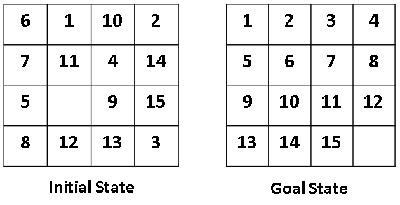

# Generate an intial state of NPuzzle

In [ ]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

def drawPuzzle(state):
    n = int(math.sqrt(len(state)))
    grid = np.array(state).reshape(n, n)

    fig, ax = plt.subplots()
    cmap = plt.cm.Blues
    ax.matshow(grid != 0, cmap=cmap)  # show nonzero tiles as blue, 0 as white

    for i in range(n):
        for j in range(n):
            val = grid[i, j]
            if val != 0:
                ax.text(j, i, str(val), va='center', ha='center', fontsize=16, color='white', weight='bold')

    ax.set_xticks(np.arange(-0.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    plt.show()


Initial state: [3, 6, 2, 8, 0, 5, 1, 7, 4]


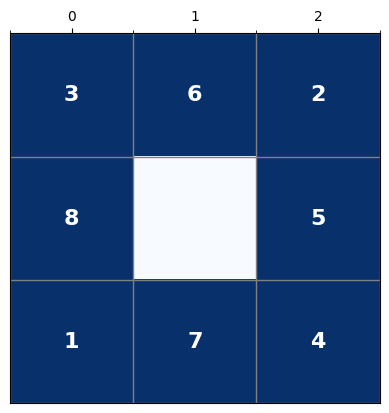

In [ ]:
def generateState(n):
    if n is None:
      n = random.choice([3,4,5])
    state = list(range(n**2))
    random.shuffle(state)
    return state
initialState = generateState(None)
print("Initial state:", initialState)
drawPuzzle(initialState)

**Get Dimension**

In [ ]:
def dimension(state):
  return int(math.sqrt(len(state)))

dimension(initialState)

3

# Calculate inversion

Inversion is a pair of tiles that are in the reverse order from where they ought to be. In our case, the bigger number is in front of the smaller one.



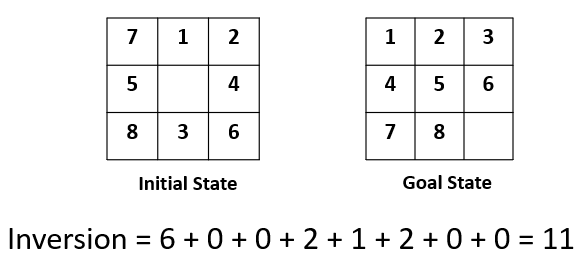

In [ ]:
def inversionCount(state):
    count = 0
    for i, a in enumerate(state):
      if a > 0:
        for b in state[i+1:]:
          if b > 0 and a > b:
            count += 1
    return count

inversionCount(initialState)

14

In [ ]:
initialState.index(0)

4

# **Find blank row**

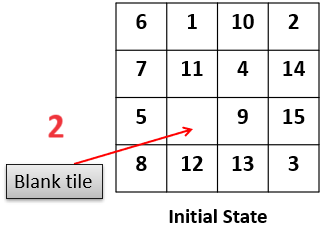

In [ ]:
# find row position of the blank tile
def blankTileRow(state):
    blank_index = state.index(0)
    return blank_index


# Solvability Rules

In [ ]:
# apply the rules to decide solvability
#  N, I, R
# define a method to return solvability (input S)
# return True if solvable or False if not

def isSolvable(state):
    N = dimension(state)
    I = inversionCount(state)
    R = blankTileRow(state)
    R_bottom = N - R - 1
    return (I + R_bottom) % 2 == 0

def dimension(state):
    import math
    return int(math.sqrt(len(state)))

In [ ]:
isSolvable(initialState)

True

Generate a solvable state.

A solvable state was found at step 1


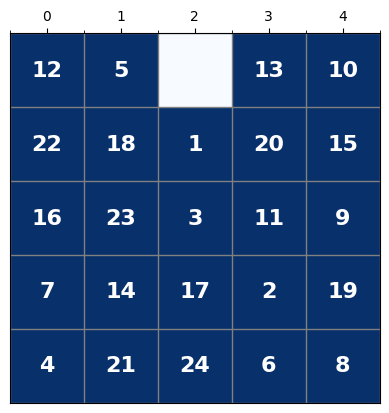

[12,
 5,
 0,
 13,
 10,
 22,
 18,
 1,
 20,
 15,
 16,
 23,
 3,
 11,
 9,
 7,
 14,
 17,
 2,
 19,
 4,
 21,
 24,
 6,
 8]

In [ ]:
def findSolvableState(max_steps=100):
    for steps in range(1, max_steps + 1):
        s = generateState(None)
        if isSolvable(s):
            print(f'A solvable state was found at step {steps}')
            drawPuzzle(s)
            return s
        if steps % 10 == 0:
            print(f'Attempted {steps} states so far...')
    print(f'Solvable state was not found in the first {max_steps} steps')
    return None

findSolvableState()